In [1]:
from __future__ import print_function

import os
import cv2

import numpy as np         # dealing with arrays
from keras import backend as K
import matplotlib.pyplot as plt
#import seaborn as sns
from keras.models import load_model
from keras.utils import plot_model
from keras.models import Model
import keras
import h5py
from imutils import paths
import random

# loading and viewing the Model

In [2]:
model = load_model('my_model.keras')
print(model.summary())
TEST_DIR='dogs_vs_cats/test/'
test_images =  list(paths.list_images(TEST_DIR))
random.shuffle(test_images)
test_images =  test_images[:15]

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      33,554,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,665,800 (384.01 MB)

 Trainable params: 33,555,266 (128.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 67,110,534 (256.01 MB)

None


In [3]:
test_images

['dogs_vs_cats/test/dogs\\8879.jpg',
 'dogs_vs_cats/test/dogs\\11509.jpg',
 'dogs_vs_cats/test/dogs\\11230.jpg',
 'dogs_vs_cats/test/cats\\6715.jpg',
 'dogs_vs_cats/test/cats\\2470.jpg',
 'dogs_vs_cats/test/dogs\\12351.jpg',
 'dogs_vs_cats/test/cats\\11555.jpg',
 'dogs_vs_cats/test/cats\\10031.jpg',
 'dogs_vs_cats/test/cats\\8130.jpg',
 'dogs_vs_cats/test/dogs\\11185.jpg',
 'dogs_vs_cats/test/dogs\\3413.jpg',
 'dogs_vs_cats/test/cats\\6487.jpg',
 'dogs_vs_cats/test/cats\\7758.jpg',
 'dogs_vs_cats/test/cats\\2717.jpg',
 'dogs_vs_cats/test/cats\\4231.jpg']

In [4]:
ROWS = 256
COLS = 256
CHANNELS=3
def create_train_data(images):


    count = len(images)
    training_data = np.ndarray((count,  ROWS, COLS,CHANNELS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        img = cv2.imread((image_file), cv2.IMREAD_COLOR)
        b, g, r = cv2.split(img)
        img2 = cv2.merge([r, g, b])
        img2=cv2.resize(img2, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
        training_data[i] = img2
        if i % 1000 == 0: print('Processed {} of {}'.format(i, count))
    return training_data

test_data = create_train_data(test_images)
print(test_data.shape)

#here we have 5 rgb images. (number of images, size,size, no of channels)

Processed 0 of 15
(15, 256, 256, 3)


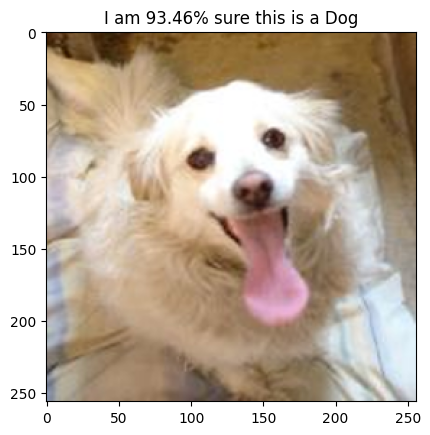

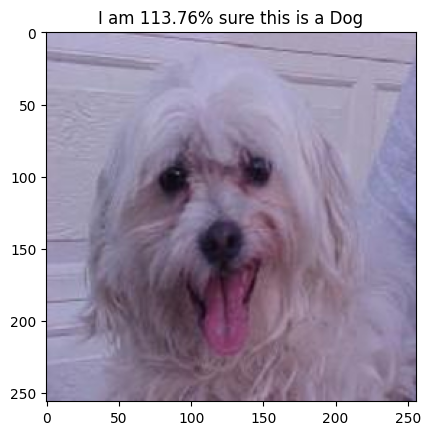

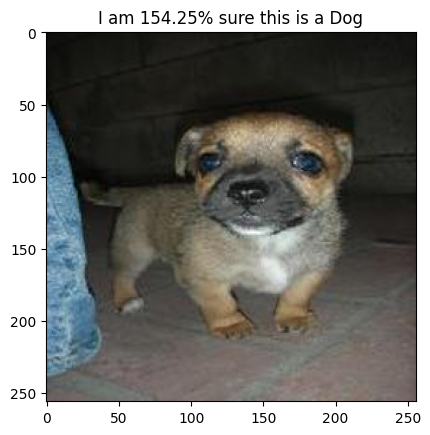

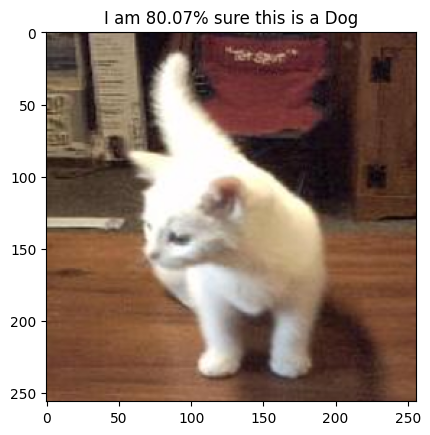

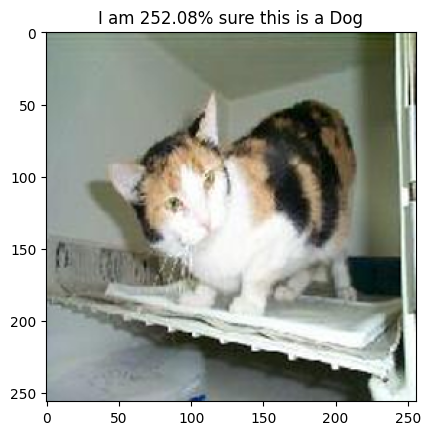

In [5]:
predictions = model.predict(test_data, verbose=0)

for i in range(0, 5):
    tmp = test_data[i]
    plt.imshow(tmp)
    if predictions[i, 0] >= 0.5:
        plt.title('I am {:.2%} sure this is a Dog'.format(predictions[i][0]))
    else:
        plt.title('I am {:.2%} sure this is a Cat'.format(1 - predictions[i][0]))


    plt.show()
    

In [6]:
img= test_data[2]   #choose image from test sample 
img_ = np.expand_dims(img, axis=0)#keras.backend.expand_dims
#
model_layers = [ layer.name for layer in model.layers]
print(model_layers)

    
def plot_feature_maps(feature_maps):
    height, width, depth = feature_maps.shape
    nb_plot = int(np.rint(np.sqrt(depth)))
    fig = plt.figure(figsize=(20, 20))
    for i in range(16):#depth
        plt.subplot(nb_plot, nb_plot, i+1)
        plt.imshow(feature_maps[:,:,i], cmap='gray')
        plt.title('feature map {}'.format(i+1))
    plt.imshow((img))
    plt.show()


def plot_layer(layer_name):
    # check if the layer_name is correct 
    assert layer_name in model_layers
    
    features_extractor = keras.models.Model([model.inputs],[model.get_layer(layer_name).output])
    feature_maps = features_extractor.predict(img_)[0]
    print("At layer \"{}\" : {} ".format(layer_name, feature_maps.shape))
    plot_feature_maps(feature_maps)
    



['rescaling', 'conv2d', 'max_pooling2d', 'flatten', 'dense', 'dense_1']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
At layer "conv2d" : (256, 256, 16) 


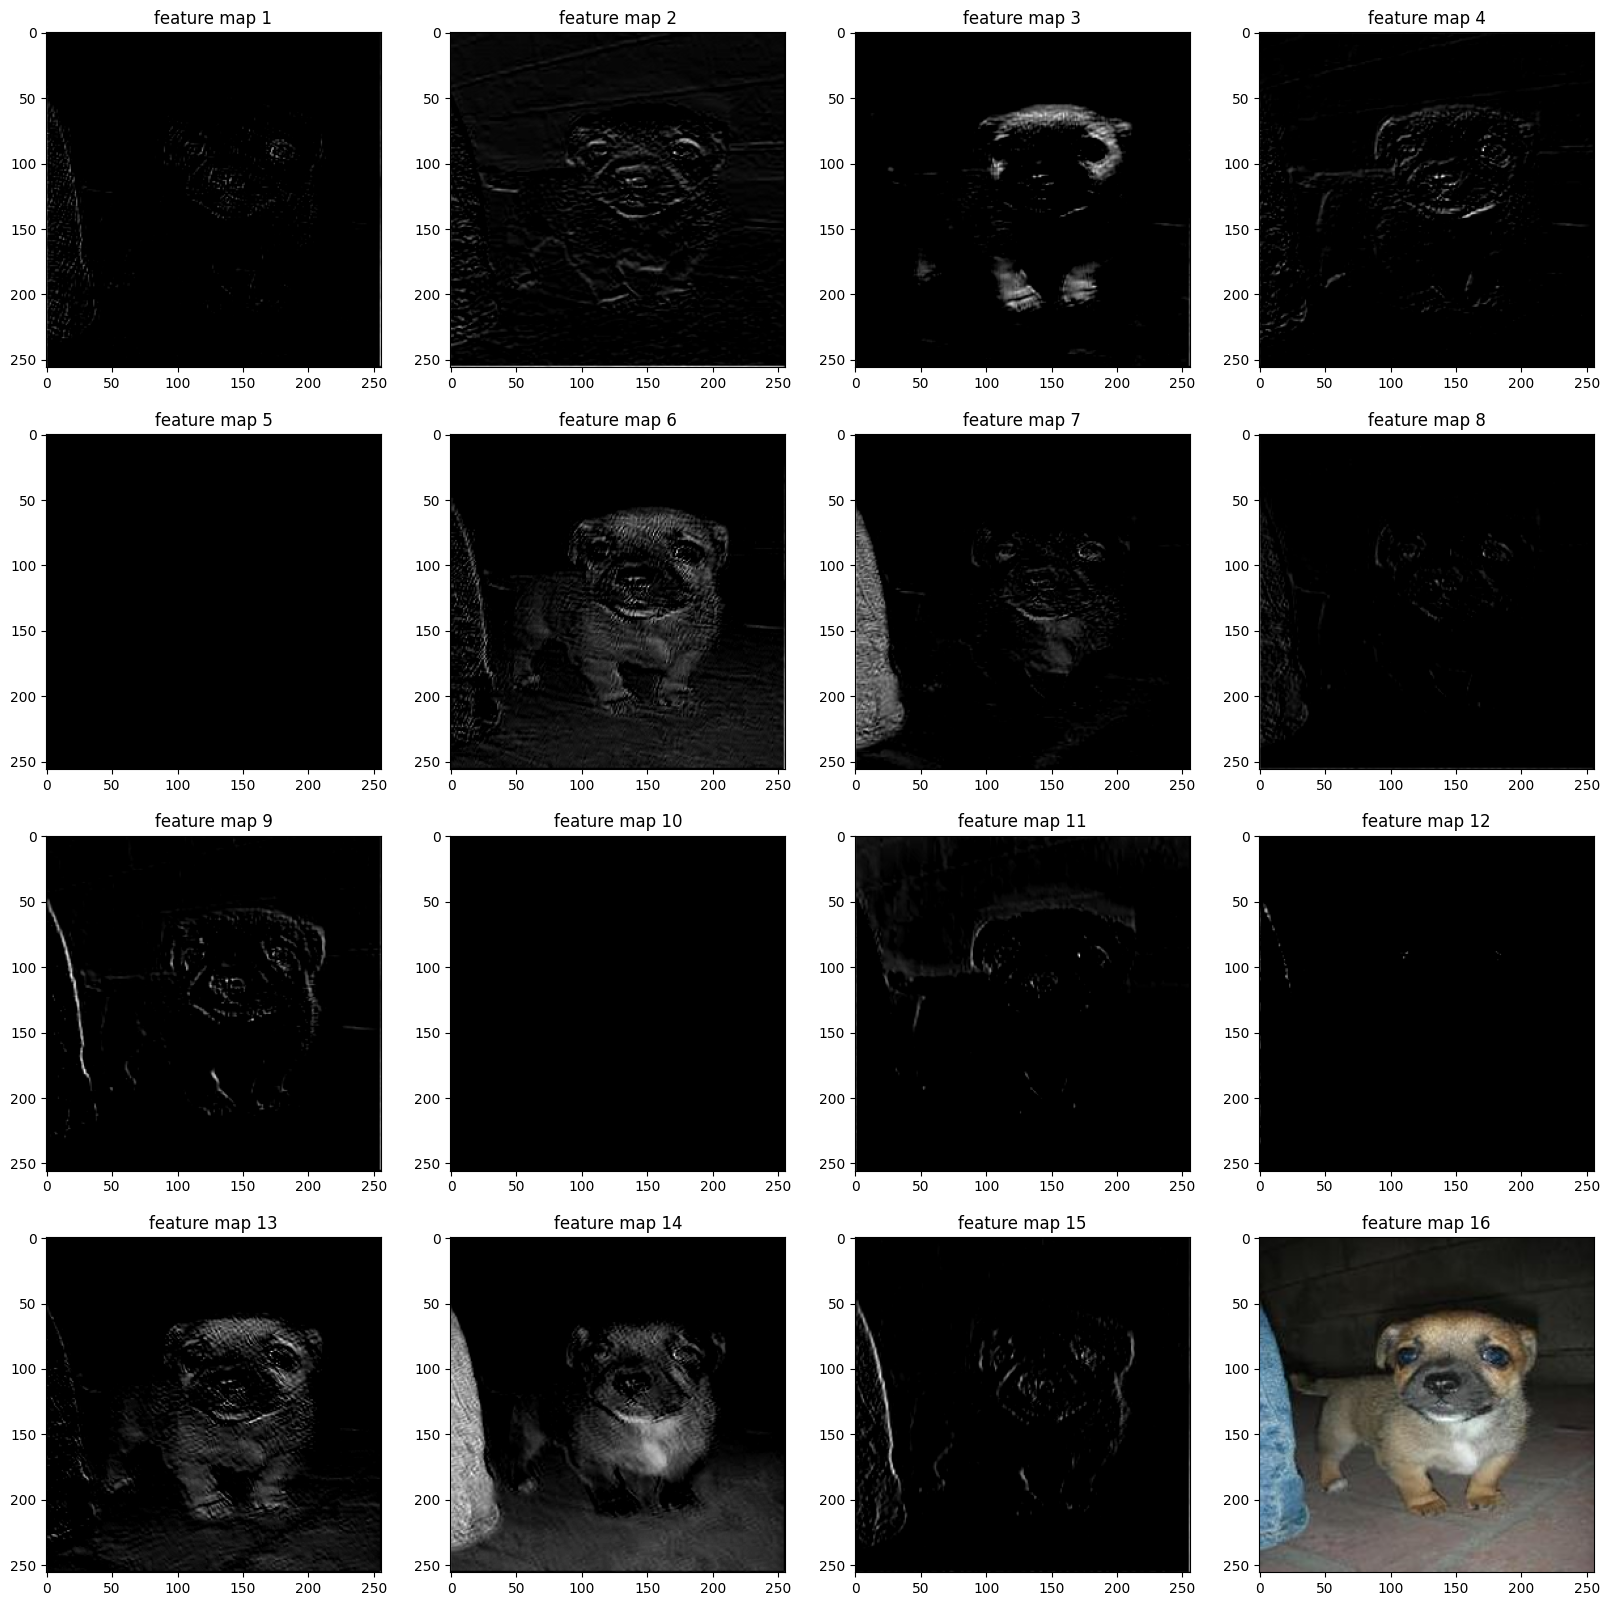

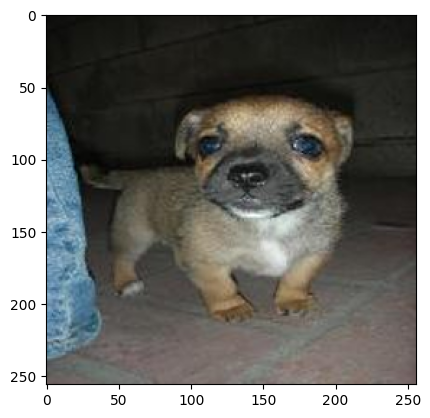

In [7]:
plot_layer('conv2d')  #check for layer name with above output

fig=plt.figure()
plt.imshow((img))
plt.show()

In [8]:
img_.shape

(1, 256, 256, 3)